In [19]:
import pandas as pd
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

In [20]:
#valhalla model, fastest
tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-1")
model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-1", device = -1)

#bart-large model
""" BartTokenizer.from_pretrained('facebook/bart-large-mnli')
model = BartForSequenceClassification.from_pretrained('facebook/bart-large-mnli') """

In [21]:
try:
    classifier = pipeline("zero-shot-classification", model = model, tokenizer = tokenizer, device = -1) #classifier = pipeline(task='zero-shot-classification', model=model, tokenizer=tokenizer, framework='pt')
except RuntimeError:
    print("A runtime error occurred, check if tensorflow and pytorch are correctly installed, need to be version >= 2")

In [22]:
df_original  = pd.read_csv(r'copy.csv')

In [29]:
# Dataprocessing should be inputted here, see Clara's code
df_name = df_original.head(500)

In [30]:
candidate_labels = ['racist', 'sexist', 'hatespeech', 'neutral', 'offensive']
candidate_results = [0, 0, 0, 0, 0]

for sent in tqdm(df_name['tweet'].values):
        
    res = classifier(sent, candidate_labels, multi_class = False) #change multiclass to True for different results

    if res['labels'][0] == 'racist' and res['scores'][0] > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if res['labels'][0] == 'sexist' and res['scores'][0] > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if res['labels'][0] == 'hatespeech' and res['scores'][0] > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if res['labels'][0] == 'neutral' and res['scores'][0] > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if res['labels'][0] == 'offensive' and res['scores'][0] > 0.5:
        candidate_results[4] = candidate_results[4] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print('\n')

print(candidate_results)

  0%|          | 1/500 [00:00<03:23,  2.46it/s]

 rt : as a woman you shouldn't complain about cleaning up your house
['sexist', 'offensive', 'hatespeech', 'neutral', 'racist']
[0.6767135858535767, 0.22318165004253387, 0.05799354240298271, 0.023365767672657967, 0.01874546892940998]




  0%|          | 2/500 [00:00<02:52,  2.89it/s]

 rt : boy dats cold
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.6546016335487366, 0.208720862865448, 0.05943605303764343, 0.04596178978681564, 0.031279657036066055]




  1%|          | 3/500 [00:01<03:36,  2.30it/s]

 rt  dawg rt : you ever fuck a bitch and she start to cry? you be confused as shit
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.5236057043075562, 0.26878634095191956, 0.13293935358524323, 0.060155872255563736, 0.014512741006910801]




  1%|          | 6/500 [00:02<03:42,  2.22it/s]

"_madison_x: the shit just blows me
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.9097088575363159, 0.050845902413129807, 0.01819656603038311, 0.017705626785755157, 0.003543033031746745]




  1%|▏         | 7/500 [00:03<03:43,  2.21it/s]

"@__brighterdays: i can not just sit up and hate on another bitch 
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.509223997592926, 0.2866005301475525, 0.13651283085346222, 0.05261067673563957, 0.01505204290151596]




  2%|▏         | 12/500 [00:05<03:18,  2.46it/s]

" murda gang bitch its gang land "
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.8031240701675415, 0.0831032395362854, 0.06897977739572525, 0.038335032761096954, 0.006457821000367403]




  3%|▎         | 14/500 [00:05<03:08,  2.58it/s]

" bad bitches is the only thing that i like "
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.5230901837348938, 0.23339080810546875, 0.14686769247055054, 0.049009453505277634, 0.04764188826084137]




  3%|▎         | 16/500 [00:06<02:48,  2.87it/s]

" bitch nigga miss me with it "
['hatespeech', 'sexist', 'racist', 'offensive', 'neutral']
[0.5087054967880249, 0.16575846076011658, 0.1568346917629242, 0.15294432640075684, 0.01575705222785473]




  4%|▎         | 18/500 [00:07<02:34,  3.13it/s]

" bitch who do you love "
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.5499895215034485, 0.181114062666893, 0.17472554743289948, 0.05999262258410454, 0.034178219735622406]




  4%|▍         | 19/500 [00:07<02:34,  3.12it/s]

" bitches get cut off everyday b "
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.528285801410675, 0.22055913507938385, 0.1457342803478241, 0.06531635671854019, 0.0401044562458992]




  5%|▌         | 26/500 [00:09<02:59,  2.64it/s]

" her pussy lips like heaven doors " 😌
['sexist', 'offensive', 'hatespeech', 'neutral', 'racist']
[0.5338175296783447, 0.2633437514305115, 0.0886407196521759, 0.06596588343381882, 0.04823213443160057]




  6%|▌         | 29/500 [00:11<02:53,  2.71it/s]

" i need a trippy bitch who fuck on hennessy "
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5512222051620483, 0.19023345410823822, 0.14391212165355682, 0.08637995272874832, 0.028252363204956055]




  6%|▌         | 31/500 [00:11<02:58,  2.63it/s]

" i txt my old bitch my new bitch pussy wetter "
['sexist', 'racist', 'offensive', 'hatespeech', 'neutral']
[0.6688522100448608, 0.10732398182153702, 0.10074561834335327, 0.09345510601997375, 0.029623111709952354]




  7%|▋         | 35/500 [00:13<03:05,  2.50it/s]

" im done with bitter bitches its a wrap for that 
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.6668269038200378, 0.2126840502023697, 0.06773339211940765, 0.03462379425764084, 0.018131939694285393]




  7%|▋         | 36/500 [00:13<02:49,  2.74it/s]

" is that ya bitch "
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5535427927970886, 0.20782968401908875, 0.17050659656524658, 0.05483533442020416, 0.01328558661043644]




  8%|▊         | 38/500 [00:14<02:52,  2.68it/s]

" jus meet son now he ya mane ass bitches " shots
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5196323394775391, 0.23774971067905426, 0.1508469581604004, 0.08276130259037018, 0.009009703993797302]




  8%|▊         | 40/500 [00:15<02:54,  2.64it/s]

" like snoop said in 94 we dont love these hoes "
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6660369634628296, 0.16990429162979126, 0.11033850908279419, 0.04308183491230011, 0.010638467036187649]




  8%|▊         | 42/500 [00:16<02:58,  2.57it/s]

" most hated but the hoes favorite " 2mw sevenone  
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.7568162679672241, 0.11802294850349426, 0.05263325199484825, 0.045814868062734604, 0.026712624356150627]




  9%|▊         | 43/500 [00:16<02:49,  2.69it/s]

" nice girls bad, make me get naughty
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5115259289741516, 0.3342258930206299, 0.0899982675909996, 0.03397142142057419, 0.030278492718935013]




  9%|▉         | 46/500 [00:17<02:50,  2.67it/s]

" pussy is a powerful drug " 😅 happyhumpday 
['sexist', 'offensive', 'hatespeech', 'neutral', 'racist']
[0.5372593402862549, 0.29745009541511536, 0.06637963652610779, 0.05692673102021217, 0.04198414087295532]




 12%|█▏        | 58/500 [00:23<04:17,  1.72it/s]

"& he's gone always be a hoe"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.525661051273346, 0.2488199770450592, 0.11338797956705093, 0.09022027999162674, 0.021910792216658592]




 12%|█▏        | 60/500 [00:24<03:04,  2.39it/s]

"

i like this movie.
['neutral', 'hatespeech', 'sexist', 'racist', 'offensive']
[0.7562035322189331, 0.1545751392841339, 0.045632123947143555, 0.02394593134522438, 0.019643288105726242]




 12%|█▏        | 61/500 [00:24<03:20,  2.19it/s]

": i probably wouldn’t mind school as much if we didn’t have to deal with bitch ass teachers"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5707045793533325, 0.18969635665416718, 0.1839710772037506, 0.041377220302820206, 0.01425085961818695]




 12%|█▏        | 62/500 [00:25<03:04,  2.37it/s]

": i'm a fucking fag they said"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5616557002067566, 0.3773993253707886, 0.03290962427854538, 0.021710922941565514, 0.006324435584247112]




 13%|█▎        | 64/500 [00:26<03:15,  2.22it/s]

": -simplyaddictedtoguys  woof woof hot scally lad
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.6487459540367126, 0.13871675729751587, 0.08148512244224548, 0.07568810880184174, 0.05536415055394173]




 13%|█▎        | 66/500 [00:27<03:37,  2.00it/s]

": how u gone bring ur side bitch to a game where you know ya gf friends at ? 😩😩😩😩" i swear
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.6680333018302917, 0.2252904623746872, 0.07762371748685837, 0.028453147038817406, 0.0005992844817228615]




 14%|█▍        | 69/500 [00:28<03:00,  2.39it/s]

"__:  ____ bitch fuck u  maybe you'll get better
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5581322312355042, 0.2240806370973587, 0.17407040297985077, 0.03390878438949585, 0.009807952679693699]




 14%|█▍        | 72/500 [00:29<03:07,  2.28it/s]

": hennessey venom gt 🙈  that's one sexy bitch
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5752512812614441, 0.18738584220409393, 0.16440114378929138, 0.03870755061507225, 0.03425421565771103]




 15%|█▍        | 73/500 [00:29<02:58,  2.39it/s]

": him seh me pussy wetter then a shower curtain
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.5414810180664062, 0.17855973541736603, 0.17069019377231598, 0.06717374920845032, 0.042095333337783813]




 15%|█▌        | 75/500 [00:31<03:29,  2.03it/s]

": yo fuck skateboarding, all y'all some wood pushing faggots man, ball is life 

['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.516147255897522, 0.3998355567455292, 0.040863197296857834, 0.025703880935907364, 0.01745017059147358]




 15%|█▌        | 76/500 [00:31<03:20,  2.12it/s]

": baby monkey bathtime 
awwwwe this is soooo adorable
['neutral', 'sexist', 'racist', 'hatespeech', 'offensive']
[0.5540323257446289, 0.13013529777526855, 0.11383172124624252, 0.11227329075336456, 0.08972737193107605]




 16%|█▌        | 80/500 [00:33<03:13,  2.17it/s]

": ppl talk bad about the ghetto/hood 
['hatespeech', 'offensive', 'racist', 'neutral', 'sexist']
[0.8995195627212524, 0.06160411983728409, 0.027985332533717155, 0.00563464779406786, 0.005256336182355881]




 16%|█▋        | 82/500 [00:34<04:01,  1.73it/s]

"_: 💯💯💯 rt _ayden bitches be wanting to act like niggas so bad 😩😩😩 that shit aint cuteeeee" but niggas act like bitches..
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.6402574777603149, 0.15053261816501617, 0.13228046894073486, 0.051974572241306305, 0.024954872205853462]




 17%|█▋        | 84/500 [00:35<02:56,  2.35it/s]

": wow
['offensive', 'sexist', 'racist', 'hatespeech', 'neutral']
[0.6869653463363647, 0.10162949562072754, 0.0989379733800888, 0.06526024639606476, 0.04720693826675415]




 17%|█▋        | 87/500 [00:36<02:40,  2.57it/s]

":  faggot read my tweets after dat k" it wasn't even funny lol
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.7290855646133423, 0.1468370258808136, 0.06929004937410355, 0.04959878697991371, 0.005188486538827419]




 18%|█▊        | 88/500 [00:36<02:36,  2.63it/s]

": this bitch was so ungrateful  fr 
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5558016300201416, 0.3317119777202606, 0.0611315555870533, 0.0335441455245018, 0.017810747027397156]




 18%|█▊        | 89/500 [00:37<02:26,  2.81it/s]

": i been kidnapped yo bitch"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5771353244781494, 0.2226659059524536, 0.13769306242465973, 0.04681096598505974, 0.01569483056664467]




 20%|█▉        | 98/500 [00:41<03:03,  2.19it/s]

": _thunduh how come you never bring me food" i dont have a car retard
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.612001359462738, 0.2511771023273468, 0.061512384563684464, 0.05749000236392021, 0.017819125205278397]




 20%|██        | 100/500 [00:42<03:01,  2.20it/s]

": how bout them cowboys" shutup pussy
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5393807291984558, 0.20104917883872986, 0.17894165217876434, 0.05428001657128334, 0.02634839154779911]




 20%|██        | 101/500 [00:42<03:09,  2.10it/s]

": lmaooooooooooo this nigga _nuh_care  <bitch want likes for some depressing shit
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5623034834861755, 0.1960054188966751, 0.13174325227737427, 0.09734246134757996, 0.012605421245098114]




 21%|██        | 104/500 [00:44<03:18,  2.00it/s]

": harlem shake is just an excuse to go full retard for 30 seconds."
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.6610756516456604, 0.183090940117836, 0.08699201047420502, 0.04977600276470184, 0.0190653707832098]




 21%|██▏       | 107/500 [00:45<03:04,  2.13it/s]

": pussy licking pussy

😕
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.6203915476799011, 0.20236429572105408, 0.145747572183609, 0.024055244401097298, 0.007441354915499687]




 22%|██▏       | 108/500 [00:46<02:53,  2.26it/s]

"_holloway: check out our 12th man
['hatespeech', 'sexist', 'neutral', 'offensive', 'racist']
[0.8004426956176758, 0.06301571428775787, 0.06056879833340645, 0.03833957388997078, 0.037633173167705536]




 22%|██▏       | 110/500 [00:47<03:21,  1.94it/s]

": _thunduh im the bitch okay nudes pat 😪😏🐸" wow
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.602806568145752, 0.2263413816690445, 0.13163813948631287, 0.029317570850253105, 0.009896373376250267]




 22%|██▏       | 111/500 [00:48<03:33,  1.82it/s]

":  you're fucking gay, blacklisted hoe" holding out for tehgodclan anyway 
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.7021926045417786, 0.20899315178394318, 0.05468535050749779, 0.029474543407559395, 0.004654362332075834]




 23%|██▎       | 113/500 [00:48<03:04,  2.10it/s]

": yall shut up:p" make me bitch
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6585386395454407, 0.21226684749126434, 0.08247677236795425, 0.03104574978351593, 0.015672072768211365]




 23%|██▎       | 114/500 [00:49<02:56,  2.19it/s]

": i hate a "i'm pregnant" type of bitch."
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5601261258125305, 0.3990032970905304, 0.03335585072636604, 0.00444028340280056, 0.003074405714869499]




 23%|██▎       | 115/500 [00:49<03:10,  2.03it/s]

"_q: got bitches in the dm but i don't ever read'em" which is y your top 3
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5743334889411926, 0.16328266263008118, 0.1318858414888382, 0.06602482497692108, 0.06447327882051468]




 23%|██▎       | 117/500 [00:50<02:46,  2.29it/s]

": little stupid as bitch i don't fuck with yoooooouuuu
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5776830315589905, 0.22082066535949707, 0.14490579068660736, 0.0373147688806057, 0.01927565038204193]




 24%|██▎       | 118/500 [00:51<02:57,  2.15it/s]

": she really asked me that dead ass serious tho, all i could say was "bitch wheet" lol
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6265555024147034, 0.17828717827796936, 0.16020837426185608, 0.02219367027282715, 0.012755264528095722]




 27%|██▋       | 135/500 [00:59<03:05,  1.96it/s]

": you a woulda coulda shoulda ass hoe 😳🙊"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.6579235196113586, 0.18843744695186615, 0.12255217880010605, 0.02812482975423336, 0.0029619664419442415]




 27%|██▋       | 136/500 [00:59<03:05,  1.96it/s]

"_ltf: happy bday bitch ass nigga "preciate that bitch roll up
['hatespeech', 'racist', 'sexist', 'offensive', 'neutral']
[0.5718271732330322, 0.1391116827726364, 0.13704581558704376, 0.13568131625652313, 0.016334014013409615]




 27%|██▋       | 137/500 [01:00<02:47,  2.17it/s]

":   used to send that bitch up"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5537000894546509, 0.19429448246955872, 0.1448054313659668, 0.08173151314258575, 0.025468453764915466]




 28%|██▊       | 141/500 [01:01<02:18,  2.59it/s]

": this isn't ghetto
['neutral', 'offensive', 'racist', 'hatespeech', 'sexist']
[0.5510963201522827, 0.23967407643795013, 0.0800582766532898, 0.06990362703800201, 0.059267666190862656]




 29%|██▉       | 146/500 [01:03<02:33,  2.30it/s]

": _abrupt bitch where u been" around the world and back
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6439127922058105, 0.26961076259613037, 0.06683177500963211, 0.01619068719446659, 0.0034539701882749796]




 30%|██▉       | 148/500 [01:05<02:51,  2.05it/s]

": oomf is soooo cute
['neutral', 'sexist', 'hatespeech', 'racist', 'offensive']
[0.5330288410186768, 0.1627807915210724, 0.14987879991531372, 0.07966849207878113, 0.07464303821325302]




 30%|███       | 151/500 [01:06<03:04,  1.89it/s]

": i wish i was a bitch like my brother keezy 😒" ooooow i bet you do
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.6951097249984741, 0.1456415355205536, 0.10588152706623077, 0.045604243874549866, 0.0077629489824175835]




 31%|███       | 156/500 [01:09<02:35,  2.21it/s]

":  oh man
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5784928202629089, 0.16718070209026337, 0.10160626471042633, 0.1009177640080452, 0.05180240422487259]




 31%|███▏      | 157/500 [01:09<02:32,  2.25it/s]

": you're not a man if you refer to every girl as a bitch"
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.5612958073616028, 0.32542917132377625, 0.06513545662164688, 0.04566027596592903, 0.002479225629940629]




 32%|███▏      | 158/500 [01:10<02:47,  2.05it/s]

": lmfao this cat started beating the shit out of me" my nigga finally got some pussy?? my nigga
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.6746929287910461, 0.11526491492986679, 0.10999659448862076, 0.08836904913187027, 0.011676491238176823]




 32%|███▏      | 159/500 [01:10<03:05,  1.83it/s]

": peel up peel up bring it back up rewind back where i'm from they move shaq from the line" ooooow who tf said that trash?
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.656252384185791, 0.15905806422233582, 0.12181831896305084, 0.059467315673828125, 0.0034038973972201347]




 32%|███▏      | 162/500 [01:12<02:30,  2.25it/s]

"_: ol dirty foot ass bitches
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.6772993803024292, 0.20614822208881378, 0.08478595316410065, 0.024370158091187477, 0.007396325469017029]




 33%|███▎      | 166/500 [01:14<02:59,  1.86it/s]

"_: these hoes ain't loyal ; no they ain't 

smfh & wonder why nobody decent wants them
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5938161611557007, 0.17748263478279114, 0.1729133576154709, 0.046285852789878845, 0.00950197409838438]




 34%|███▍      | 169/500 [01:15<02:34,  2.14it/s]

": shut yo bitch ass up  😭😂
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6670531034469604, 0.2657759487628937, 0.0498458556830883, 0.013842063024640083, 0.003483044682070613]




 34%|███▍      | 170/500 [01:16<02:40,  2.06it/s]

": gucci mane in jail and dropping mixtapes every month and you hoes can't even text back"
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5548080205917358, 0.21501058340072632, 0.18556787073612213, 0.032634057104587555, 0.011979454196989536]




 34%|███▍      | 171/500 [01:16<02:35,  2.12it/s]

": you love these hoes more then money wats wrong these niggas"
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.5039127469062805, 0.2674596905708313, 0.14235422015190125, 0.07778758555650711, 0.008485754951834679]




 34%|███▍      | 172/500 [01:17<02:38,  2.08it/s]

": a loyal bitch from the burbs without daddy issues is like finding a holographic mewtwo
['sexist', 'offensive', 'hatespeech', 'neutral', 'racist']
[0.5008366107940674, 0.19337105751037598, 0.14307479560375214, 0.090678870677948, 0.0720386803150177]




 35%|███▌      | 175/500 [01:18<02:33,  2.11it/s]

": wish i had a bae 😕"

you got all the hoes tho
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.6814061403274536, 0.15294376015663147, 0.10581950098276138, 0.03220444917678833, 0.027626190334558487]




 36%|███▌      | 179/500 [01:20<02:26,  2.19it/s]

": lmao fucking snake bitches" @ em
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5148379802703857, 0.22006554901599884, 0.21329349279403687, 0.046075254678726196, 0.00572779169306159]




 36%|███▌      | 180/500 [01:20<02:37,  2.03it/s]

"_aizah: big booty hoes everywhere sheesh 😍" damn 🌿👀🌿
['sexist', 'offensive', 'racist', 'hatespeech', 'neutral']
[0.5380023121833801, 0.320174902677536, 0.06840002536773682, 0.054652195423841476, 0.018770575523376465]




 37%|███▋      | 183/500 [01:22<02:51,  1.85it/s]

": oregon chokes every year get off the field trash ass program" rft
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6457644701004028, 0.2717534005641937, 0.03315659984946251, 0.025262514129281044, 0.024063048884272575]




 37%|███▋      | 185/500 [01:23<02:45,  1.91it/s]

": lmfaoooo i hate black people  this is why there's black people and niggers
['hatespeech', 'racist', 'offensive', 'sexist', 'neutral']
[0.7335664629936218, 0.16269128024578094, 0.09518028795719147, 0.007764995098114014, 0.0007969448924995959]




 37%|███▋      | 187/500 [01:24<02:17,  2.27it/s]

":  a pissed lad past out
['hatespeech', 'offensive', 'neutral', 'sexist', 'racist']
[0.7146607637405396, 0.15348225831985474, 0.05813935771584511, 0.037729017436504364, 0.035988543182611465]




 38%|███▊      | 188/500 [01:24<02:11,  2.37it/s]

":  love frat boy w/ soft long soles
['neutral', 'sexist', 'hatespeech', 'racist', 'offensive']
[0.5058584809303284, 0.2072262167930603, 0.11618346720933914, 0.10329681634902954, 0.06743501871824265]




 38%|███▊      | 190/500 [01:25<02:19,  2.23it/s]

": _thunduh nah fam i gotta cheat with the hoes" depends on the female i feel
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.6089981198310852, 0.2448548674583435, 0.08742557466030121, 0.036307331174612045, 0.022414028644561768]




 39%|███▊      | 193/500 [01:27<02:27,  2.08it/s]

"_x3: toto means ass or vagina?"i think pussy cause toto santi is like nasty pussy
['offensive', 'sexist', 'racist', 'hatespeech', 'neutral']
[0.5036858916282654, 0.3245271146297455, 0.06929514557123184, 0.0686044692993164, 0.033887434750795364]




 39%|███▉      | 195/500 [01:28<02:18,  2.20it/s]

": bitch couldn't kill my vibe if ya tried
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.5115898251533508, 0.20942804217338562, 0.15001487731933594, 0.07007426023483276, 0.05889294296503067]




 39%|███▉      | 196/500 [01:28<02:11,  2.32it/s]

"_: i'm tired of bitches saying i look mean
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.5791497230529785, 0.1871809959411621, 0.14762693643569946, 0.04612697660923004, 0.03991536423563957]




 40%|████      | 200/500 [01:29<01:50,  2.71it/s]

": money getting taller and bitches getting blurry"
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.7534424662590027, 0.09932638704776764, 0.07686541229486465, 0.04073815420269966, 0.02962764911353588]




 40%|████      | 202/500 [01:30<01:57,  2.53it/s]

"_ted33: kobe stay talking trash
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.8558751940727234, 0.09926602244377136, 0.020938105881214142, 0.01821550540626049, 0.005705127492547035]




 42%|████▏     | 209/500 [01:34<02:10,  2.23it/s]

"_brat: we don't love these hoes 👐🙅"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6494461894035339, 0.18636824190616608, 0.11835096031427383, 0.035613082349300385, 0.010221589356660843]




 43%|████▎     | 213/500 [01:35<02:04,  2.31it/s]

"_success: i hate when strippers tell you they're "dancers"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5303521752357483, 0.4113972783088684, 0.03938819468021393, 0.014101861044764519, 0.0047605158761143684]




 43%|████▎     | 214/500 [01:36<02:09,  2.21it/s]

": andrewbryant: poff has double vision after 2 beers
poff: 
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.5860302448272705, 0.22098687291145325, 0.08598656207323074, 0.053904831409454346, 0.05309141427278519]




 43%|████▎     | 217/500 [01:37<02:08,  2.20it/s]

": 61% of welfare/government aid is claimed by white people
['racist', 'sexist', 'offensive', 'hatespeech', 'neutral']
[0.5896990895271301, 0.19858944416046143, 0.09749910980463028, 0.06976497918367386, 0.04444742202758789]




 44%|████▎     | 218/500 [01:38<02:01,  2.33it/s]

": these bitches don't care they just play that role."
['sexist', 'offensive', 'hatespeech', 'racist', 'neutral']
[0.6726232171058655, 0.12155770510435104, 0.08238830417394638, 0.07578510791063309, 0.04764563962817192]




 44%|████▍     | 222/500 [01:40<02:03,  2.25it/s]

": “_: _  hoes austin” teach us austin
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6440499424934387, 0.17578691244125366, 0.1303882598876953, 0.042115144431591034, 0.007659668102860451]




 45%|████▍     | 223/500 [01:40<01:57,  2.36it/s]

": bitches can't cook but know how to suck dick 
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.6448774337768555, 0.1497240662574768, 0.1479148119688034, 0.04072603955864906, 0.016757650300860405]




 45%|████▌     | 226/500 [01:41<01:55,  2.37it/s]

": _scrooge @_nevertrustt ol bitch ass" 
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.8221995234489441, 0.08819866180419922, 0.066851407289505, 0.013197625055909157, 0.009552800096571445]




 46%|████▌     | 229/500 [01:43<02:24,  1.87it/s]

" : holy shit, freddie highmore was in charlie and the chocolate factory"
me: *rolls on the floor, laughing*
['offensive', 'racist', 'hatespeech', 'sexist', 'neutral']
[0.7079293131828308, 0.10352154076099396, 0.09830144792795181, 0.06133810803294182, 0.028909575194120407]




 46%|████▌     | 231/500 [01:44<02:19,  1.93it/s]

": @ one of your followers with this 😍😩  @ somebody, bitch if you don't
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5329951643943787, 0.38081154227256775, 0.05967117100954056, 0.022495251148939133, 0.004026839043945074]




 46%|████▋     | 232/500 [01:44<02:16,  1.97it/s]

"_jenkins: if ya bitch always bitching clearly she care" or just an annoying bitch
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.7144178748130798, 0.1487007737159729, 0.09158963710069656, 0.030118338763713837, 0.015173422172665596]




 47%|████▋     | 236/500 [01:47<02:34,  1.71it/s]

"_stokes: 😂😂😂😂rt _4: lmao this bitch come scooting in the tent like she about to fuck some shit up" 😭😭😭
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.7072893977165222, 0.1306380331516266, 0.07673165202140808, 0.06950505077838898, 0.0158358383923769]




 48%|████▊     | 240/500 [01:48<01:59,  2.18it/s]

":  oh yeah fuck that bitch
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.7836515307426453, 0.11753992736339569, 0.0552864633500576, 0.022114291787147522, 0.021407784894108772]




 49%|████▊     | 243/500 [01:50<02:04,  2.06it/s]

": guess what? i also have zero time for your mansplaining adios" stfu pussy
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5808871388435364, 0.2897988557815552, 0.09672029316425323, 0.017966875806450844, 0.014626857824623585]




 49%|████▉     | 244/500 [01:50<01:53,  2.26it/s]

": chilling 👅™  sexy scally lad
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.5580823421478271, 0.20778542757034302, 0.13061660528182983, 0.07129837572574615, 0.03221718221902847]




 49%|████▉     | 246/500 [01:51<01:45,  2.40it/s]

": money only impress the simple broke bitches"
['sexist', 'hatespeech', 'offensive', 'neutral', 'racist']
[0.6289116144180298, 0.2311006486415863, 0.07605010271072388, 0.040214989334344864, 0.023722607642412186]




 50%|████▉     | 249/500 [01:53<01:57,  2.14it/s]

"_jonez:   i'm not mad cuh hahaha" suure
['neutral', 'sexist', 'hatespeech', 'racist', 'offensive']
[0.8711315989494324, 0.045941758900880814, 0.03679094836115837, 0.02551761269569397, 0.02061809040606022]




 50%|█████     | 252/500 [01:54<01:50,  2.23it/s]

": oomf so fuckin fine tho 😩 dam" @ her, don't be no bitch.
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.642066240310669, 0.20004881918430328, 0.11798655241727829, 0.0314357616007328, 0.008462565019726753]




 51%|█████     | 253/500 [01:54<02:05,  1.97it/s]

": i wonder if the girl that gave head to 24 boys for a drink in magaluf has twitter" she probly sends nudes for fags
['sexist', 'offensive', 'hatespeech', 'neutral', 'racist']
[0.5320196151733398, 0.240931898355484, 0.14436523616313934, 0.042251914739608765, 0.040431443601846695]




 51%|█████     | 255/500 [01:56<02:07,  1.92it/s]

": hickies in between her thighs right by her pussy >>>" its only right
['sexist', 'offensive', 'racist', 'neutral', 'hatespeech']
[0.5324380397796631, 0.21642328798770905, 0.11213784664869308, 0.09243644028902054, 0.04656435549259186]




 52%|█████▏    | 258/500 [01:57<01:42,  2.37it/s]

":  faggot bitch" 
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6030916571617126, 0.21566033363342285, 0.15620742738246918, 0.022683946415781975, 0.0023566705640405416]




 52%|█████▏    | 259/500 [01:57<01:42,  2.36it/s]

"_realist_sam: _ yea, i'm on my ipad
['neutral', 'hatespeech', 'sexist', 'racist', 'offensive']
[0.5293210744857788, 0.1887858510017395, 0.13793636858463287, 0.07379046827554703, 0.07016631960868835]




 53%|█████▎    | 265/500 [02:01<02:22,  1.65it/s]

"_gfg: “: no slushes 😥”hoes nasty anyway fam"😴
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.607187032699585, 0.22731857001781464, 0.13808727264404297, 0.01893315464258194, 0.008473949506878853]




 53%|█████▎    | 266/500 [02:01<02:21,  1.65it/s]

"_gfg: bobby bitch-by  be getting me live as fuck" hell yea i play that hoe before my workout
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5113371014595032, 0.22322389483451843, 0.18860085308551788, 0.05350210517644882, 0.02333606593310833]




 54%|█████▍    | 269/500 [02:03<01:57,  1.96it/s]

": and if you ain't a hoe get up out my traphoussseeeee"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.6984866261482239, 0.1456986963748932, 0.09207578748464584, 0.058274608105421066, 0.005464258138090372]




 54%|█████▍    | 270/500 [02:03<01:46,  2.16it/s]

": 15 sad tv character deaths we're still bitter over
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.8400999903678894, 0.04659881070256233, 0.044395122677087784, 0.037806957960128784, 0.03109903633594513]




 55%|█████▍    | 273/500 [02:04<01:51,  2.04it/s]

": ultraviolence video, its coming you little bitch mtvhottest lana del rey  

bitchy promo
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5689260363578796, 0.29069802165031433, 0.1253562867641449, 0.010341716930270195, 0.004677917808294296]




 55%|█████▍    | 274/500 [02:05<01:51,  2.03it/s]

": on my way to fuck your bitch 

lmfao kittycopter
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.7485657334327698, 0.1412571370601654, 0.07900543510913849, 0.026612618938088417, 0.004559112247079611]




 55%|█████▌    | 276/500 [02:06<02:09,  1.73it/s]

"_: ": aww their avis look so cute together 💑  💀💀💀" do i gotta get ike avi on this bitch ?
['sexist', 'racist', 'hatespeech', 'neutral', 'offensive']
[0.5168504118919373, 0.13013005256652832, 0.12155849486589432, 0.11997617781162262, 0.11148492991924286]




 56%|█████▌    | 280/500 [02:08<01:58,  1.85it/s]

"_xpdotjdot: damn near gotta protect my tweets
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5090607404708862, 0.17276760935783386, 0.12982170283794403, 0.12197644263505936, 0.06637346744537354]




 57%|█████▋    | 287/500 [02:12<01:38,  2.17it/s]

": sad knowing that most hoes won't fuck with you bc you ain't got stacks
['sexist', 'hatespeech', 'offensive', 'neutral', 'racist']
[0.5137101411819458, 0.23055203258991241, 0.11523611098527908, 0.072757788002491, 0.06774380058050156]




 58%|█████▊    | 289/500 [02:13<01:39,  2.11it/s]

":  ewww i said that last sunday
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.5706803202629089, 0.3646903932094574, 0.034988585859537125, 0.015031586401164532, 0.014609096571803093]




 59%|█████▉    | 295/500 [02:16<02:00,  1.70it/s]

"@__sugga: there's a lane some bitches need to stay in 😎" the left n get right the fuck outta our face 😭💁😘
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5671278238296509, 0.24963879585266113, 0.1494549959897995, 0.029763592407107353, 0.0040147691033780575]




 60%|█████▉    | 298/500 [02:18<01:46,  1.90it/s]

"@__yourewelcome: im a boss ass bitch" 
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5285451412200928, 0.31798678636550903, 0.10840091854333878, 0.035439684987068176, 0.009627512656152248]




 60%|██████    | 302/500 [02:20<01:49,  1.81it/s]

"@_simplycaitlin: why do my friends hate me" because you a ratchet hoe..
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5886363387107849, 0.29789528250694275, 0.08327371627092361, 0.02415536344051361, 0.0060392264276742935]




 61%|██████    | 303/500 [02:20<01:38,  2.00it/s]

": no love for these fuck niggas" hoes*
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.8078402876853943, 0.09511024504899979, 0.06277474015951157, 0.026250984519720078, 0.008023681119084358]




 61%|██████    | 305/500 [02:21<01:21,  2.40it/s]

": sniff  perved up scally lad
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.7379761934280396, 0.10150422900915146, 0.06606075167655945, 0.0519581064581871, 0.04250066727399826]




 61%|██████▏   | 307/500 [02:22<01:34,  2.04it/s]

"__: “_thunduh: i legit watched it for about 30 or 40 seconds 😑”so did i wtf" prob cause were retarded smh
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.6709320545196533, 0.14998763799667358, 0.08532817661762238, 0.06124306470155716, 0.032509058713912964]




 62%|██████▏   | 312/500 [02:24<01:28,  2.11it/s]

": 10 sex positions   this what u call fucking the soul outta bitch 😭
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5855580568313599, 0.21976445615291595, 0.16847634315490723, 0.021203385666012764, 0.004997758660465479]




 64%|██████▍   | 320/500 [02:28<01:11,  2.51it/s]

"_jenn99: i'm gonna miss that bitch of a bus driver
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.6494491100311279, 0.1543353796005249, 0.09873785078525543, 0.056692253798246384, 0.04078539460897446]




 64%|██████▍   | 321/500 [02:28<01:10,  2.53it/s]

": hate when bitches try and put you in the friendzone
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6391267776489258, 0.24676257371902466, 0.09786777943372726, 0.0085590910166502, 0.007683740463107824]




 64%|██████▍   | 322/500 [02:29<01:19,  2.25it/s]

"_uk: ashley young has tried to deny that bird s*** landed in his mouth --->   hahaha
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5172149538993835, 0.2390861064195633, 0.13053104281425476, 0.07417905330657959, 0.03898883983492851]




 66%|██████▌   | 328/500 [02:31<01:14,  2.30it/s]

": they ban dat pussy for life & he gotta pay 2
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.5650008916854858, 0.19897212088108063, 0.15420404076576233, 0.06338600814342499, 0.01843695156276226]




 66%|██████▌   | 329/500 [02:32<01:16,  2.22it/s]

": roses are red and violets are blue and niggers are black, you know that's true
['racist', 'hatespeech', 'offensive', 'sexist', 'neutral']
[0.5698740482330322, 0.14398083090782166, 0.1435246467590332, 0.11281810700893402, 0.029802320525050163]




 67%|██████▋   | 333/500 [02:34<01:27,  1.91it/s]

"_im_angie:   i'm not even shy stfu" kikis mom: hi angelique 
angelique: smiles *dips cracker in soup*
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.5700005292892456, 0.14603166282176971, 0.1280285269021988, 0.09486750513315201, 0.06107177957892418]




 67%|██████▋   | 335/500 [02:35<01:31,  1.81it/s]

": karma is a bitch damn godprotectshisangels 🙌"

*sips tea*
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.660073459148407, 0.23870551586151123, 0.05184412747621536, 0.031216822564601898, 0.0181600172072649]




 67%|██████▋   | 337/500 [02:36<01:17,  2.09it/s]

": jihadi patron hajjaj al-ajmi is arrested at kuwait airport 
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.539904773235321, 0.23658354580402374, 0.1014215424656868, 0.06330037862062454, 0.05878975987434387]




 68%|██████▊   | 340/500 [02:37<01:22,  1.94it/s]

": watch women try to argue with me like they have a dick and actually fucked some pussy before" i hate when bitches do that
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5668271780014038, 0.22582636773586273, 0.19947965443134308, 0.004984469152987003, 0.0028823178727179766]




 68%|██████▊   | 341/500 [02:38<01:27,  1.81it/s]

": and smoke weed in public, fuck cops man, do what you wanna do, they don't own you, run if they come" are you retarded?
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.6697032451629639, 0.16167406737804413, 0.08938708901405334, 0.055513251572847366, 0.02372235804796219]




 69%|██████▉   | 344/500 [02:39<01:11,  2.18it/s]

"_: when twitter rappers dm me their trash links 
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5495926141738892, 0.3504076302051544, 0.03425447270274162, 0.034224070608615875, 0.031521204859018326]




 69%|██████▉   | 345/500 [02:39<01:03,  2.43it/s]

": loud bitches annoy me"
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.5455589890480042, 0.2190437763929367, 0.19880461692810059, 0.025598689913749695, 0.010993905365467072]




 70%|██████▉   | 348/500 [02:41<01:01,  2.48it/s]

"_jam: you bitches be pretending to be tf crazy
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5306403636932373, 0.2743155062198639, 0.14726337790489197, 0.0261081550270319, 0.02167256362736225]




 70%|███████   | 351/500 [02:42<01:03,  2.34it/s]

": ima keep on giving these pussy ass niggas ah reason to hate "
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.8695374727249146, 0.09347699582576752, 0.020334189757704735, 0.014916997402906418, 0.0017343750223517418]




 71%|███████   | 353/500 [02:43<00:58,  2.50it/s]

": stacey dash won 💦  baddest bitch evaaaa
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.7663664221763611, 0.10230133682489395, 0.09329269826412201, 0.025715667754411697, 0.012323915027081966]




 71%|███████   | 354/500 [02:43<01:00,  2.39it/s]

": side bitch sunday 😂😂😂" 😂😂😂
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5927487015724182, 0.1765035092830658, 0.16965527832508087, 0.04406215250492096, 0.0170303825289011]




 71%|███████   | 355/500 [02:44<01:06,  2.17it/s]

"_eazy26: facts what baldheaded bitch made this shit

lmao 😩😂
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.5539239645004272, 0.24409250915050507, 0.11989478766918182, 0.07611924409866333, 0.005969438701868057]




 71%|███████   | 356/500 [02:44<01:05,  2.19it/s]

"_: fuck wit us and then we tweakin hoe" shmurda
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6410715579986572, 0.17956633865833282, 0.11741236597299576, 0.050229113548994064, 0.011720636859536171]




 71%|███████▏  | 357/500 [02:45<01:05,  2.17it/s]

": we actin like it's the 7th day  
👻spook
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.6500005722045898, 0.2445603758096695, 0.06916730850934982, 0.02335812896490097, 0.01291371788829565]




 72%|███████▏  | 358/500 [02:45<01:05,  2.16it/s]

": i'll break that lil bitch neck and won't even feel sorry about it" savage
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6737591624259949, 0.1978735476732254, 0.07711368799209595, 0.0476742647588253, 0.0035792971029877663]




 72%|███████▏  | 361/500 [02:46<01:03,  2.19it/s]

"_: i can turn yo bitch into a eaterrrrrrrrr"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5061145424842834, 0.24962067604064941, 0.15119388699531555, 0.08091609179973602, 0.01215478964149952]




 73%|███████▎  | 365/500 [02:49<01:16,  1.77it/s]

": colored contacts in your eyes?
blinders on mine.
cause i can't see you at all
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5653994083404541, 0.23196426033973694, 0.1061493381857872, 0.06462027877569199, 0.03186674788594246]




 73%|███████▎  | 366/500 [02:50<01:17,  1.74it/s]

"_westt: facts ": only the dudes with hoes say they don't got hoes”" _austin12
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5276606678962708, 0.21803781390190125, 0.12178691476583481, 0.08920253813266754, 0.04331206902861595]




 73%|███████▎  | 367/500 [02:50<01:12,  1.85it/s]

"_: i'm rea start smacking bitches period " bluffin at its best
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.8016616702079773, 0.10424678772687912, 0.05993518605828285, 0.026349900290369987, 0.007806476671248674]




 74%|███████▎  | 368/500 [02:51<01:17,  1.71it/s]

": lifes a bitch, and then you die 
thats why we get high, cause you neva know when you're gonna go" my sister is perfect (:
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.6177220344543457, 0.13756181299686432, 0.11627795547246933, 0.07311191409826279, 0.05532628297805786]




 74%|███████▍  | 370/500 [02:52<01:07,  1.93it/s]

": i'm feeling pretty fuckin ghetto" smh
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.6798020005226135, 0.20073486864566803, 0.06219290941953659, 0.047348394989967346, 0.009921815246343613]




 74%|███████▍  | 372/500 [02:53<01:11,  1.78it/s]

"_jrock__: this is a true ride or die bitch 💯  what the fuck hahahahah
['offensive', 'hatespeech', 'sexist', 'racist', 'neutral']
[0.6307812929153442, 0.20610371232032776, 0.12507036328315735, 0.028372935950756073, 0.009671707637608051]




 75%|███████▍  | 374/500 [02:54<00:57,  2.17it/s]

"_jaylene: all i see is bruno's bitch ass on my twitter now
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5700090527534485, 0.22053565084934235, 0.1383909434080124, 0.05839786306023598, 0.012666541151702404]




 75%|███████▌  | 375/500 [02:54<01:00,  2.06it/s]

"_garza: _thunduh i'm about to cool faggot chill" tf is cool nigga
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.5565264225006104, 0.20775893330574036, 0.1267487108707428, 0.07217030227184296, 0.036795638501644135]




 75%|███████▌  | 377/500 [02:55<01:05,  1.88it/s]

": twitter is not a source of news broadcast you fucking retards" it is when nbc, abc, cnn, fox, etc are all keeping quiet.
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.5811469554901123, 0.3628361225128174, 0.027431443333625793, 0.023511134088039398, 0.005074343644082546]




 76%|███████▋  | 382/500 [02:58<00:56,  2.10it/s]

": no text back? i don't give a fuck, i'll text another bitch" damn someone is hurt lol
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5979854464530945, 0.201354518532753, 0.17722292244434357, 0.017766548320651054, 0.005670585203915834]




 77%|███████▋  | 386/500 [02:59<00:50,  2.24it/s]

": hell yeah bro  fuck yeah sexy scally lad in hot gear
['sexist', 'hatespeech', 'offensive', 'neutral', 'racist']
[0.5614096522331238, 0.14910265803337097, 0.09973211586475372, 0.09680342674255371, 0.0929521769285202]




 78%|███████▊  | 392/500 [03:03<01:00,  1.78it/s]

"_yongguk: "i saw an ajumma walk out in the beginning saying, 'wow, this is so trash that i can't even listen to it
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.7890478372573853, 0.12822164595127106, 0.05408987030386925, 0.025193825364112854, 0.0034468246158212423]




 79%|███████▉  | 394/500 [03:03<00:46,  2.28it/s]

": i don't ever expose females like that
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.7160007357597351, 0.1952158808708191, 0.0603625550866127, 0.016090335324406624, 0.012330541387200356]




 79%|███████▉  | 396/500 [03:04<00:52,  2.00it/s]

"_: dude remember this wop video?   omg where did you find that
['offensive', 'racist', 'sexist', 'hatespeech', 'neutral']
[0.6669268012046814, 0.11444131284952164, 0.10943536460399628, 0.06862745434045792, 0.04056907072663307]




 81%|████████  | 404/500 [03:08<00:40,  2.35it/s]

": annoying bitch that i love  judyann's so pretty
['hatespeech', 'offensive', 'sexist', 'neutral', 'racist']
[0.8119826316833496, 0.08185514807701111, 0.07072906196117401, 0.02040543034672737, 0.015027783811092377]




 82%|████████▏ | 409/500 [03:10<00:44,  2.03it/s]

"__: can't stand a "i don't know what i want" ass nigga 😴" bitch*
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.5417653322219849, 0.37462612986564636, 0.048346392810344696, 0.031412526965141296, 0.003849646309390664]




 83%|████████▎ | 416/500 [03:13<00:35,  2.38it/s]

"_: these hoes ain't loyal."
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5161654353141785, 0.2883048355579376, 0.130859375, 0.04672211781144142, 0.017948273569345474]




 84%|████████▎ | 418/500 [03:14<00:32,  2.53it/s]

": i made that bitch lunch
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.526374876499176, 0.1847320795059204, 0.17333157360553741, 0.0670599490404129, 0.048501547425985336]




 84%|████████▍ | 419/500 [03:15<00:37,  2.15it/s]

"a no brainer"
but as soon as this bitch gets rich in political power, her views will change
political whores 
['sexist', 'hatespeech', 'offensive', 'racist', 'neutral']
[0.5758289694786072, 0.16387052834033966, 0.14617730677127838, 0.07825413346290588, 0.03586910665035248]




 85%|████████▌ | 425/500 [03:17<00:32,  2.29it/s]

"bae" sounds like such a ghetto word
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.6072512865066528, 0.2728091776371002, 0.09675034880638123, 0.01945856399834156, 0.0037305739242583513]




 85%|████████▌ | 427/500 [03:18<00:36,  2.01it/s]

"bleed out hoe" -alexa
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.588126003742218, 0.21705511212348938, 0.13761860132217407, 0.04972892254590988, 0.0074714310467243195]




 86%|████████▌ | 428/500 [03:19<00:33,  2.13it/s]

"boolinin the bando wit a few bitches"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5014380812644958, 0.3196152150630951, 0.09384234249591827, 0.07176140695810318, 0.013342924416065216]




 86%|████████▌ | 429/500 [03:19<00:31,  2.25it/s]

"brownies for my brownie" i love this movie
['neutral', 'hatespeech', 'sexist', 'racist', 'offensive']
[0.6493796706199646, 0.11224603652954102, 0.10272472351789474, 0.07583893090486526, 0.059810664504766464]




 86%|████████▌ | 430/500 [03:20<00:33,  2.09it/s]

"but i need a bad bitch that's hotter than me" might be the realist shit partynextdoor ever said
['hatespeech', 'sexist', 'offensive', 'neutral', 'racist']
[0.5044448971748352, 0.26844465732574463, 0.17696790397167206, 0.03134587034583092, 0.018796628341078758]




 87%|████████▋ | 436/500 [03:23<00:35,  1.79it/s]

"don't know no ugly bitches don't know no broke niggas"--_gates
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5480504631996155, 0.2140350341796875, 0.13232047855854034, 0.09759952872991562, 0.007994475774466991]




 88%|████████▊ | 439/500 [03:24<00:28,  2.17it/s]

"don't you ever give my pussy away
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5732693672180176, 0.23221854865550995, 0.12493984401226044, 0.04347165301442146, 0.02610064670443535]




 88%|████████▊ | 440/500 [03:25<00:30,  1.94it/s]

"dropped a stack cause bitch i'm on".
- 
song called "dope".
download the mixtape here: 
['sexist', 'hatespeech', 'offensive', 'neutral', 'racist']
[0.5337359309196472, 0.17270073294639587, 0.10321971029043198, 0.09938141703605652, 0.09096220880746841]




 88%|████████▊ | 441/500 [03:25<00:27,  2.17it/s]

"dumb bitches do dumb things"
['sexist', 'hatespeech', 'offensive', 'neutral', 'racist']
[0.7704631686210632, 0.11972977221012115, 0.04777698218822479, 0.043857455253601074, 0.018172580748796463]




 89%|████████▉ | 444/500 [03:26<00:20,  2.71it/s]

"everything look better with a bitch next to it"
['sexist', 'hatespeech', 'racist', 'offensive', 'neutral']
[0.7155665159225464, 0.10842910408973694, 0.0867680013179779, 0.08396902680397034, 0.005267308559268713]




 90%|████████▉ | 449/500 [03:28<00:18,  2.73it/s]

"fuck 5/0 i make my own rules
['hatespeech', 'offensive', 'neutral', 'sexist', 'racist']
[0.5998254418373108, 0.2955533266067505, 0.04269606992602348, 0.03142767772078514, 0.030497431755065918]




 90%|█████████ | 452/500 [03:29<00:20,  2.40it/s]

"get your ass back to detroit ya fuckinwigger"
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.5273175239562988, 0.2671006917953491, 0.16232939064502716, 0.03629254549741745, 0.006959861144423485]




 91%|█████████ | 454/500 [03:30<00:20,  2.28it/s]

"how do you know my twitter password" bitch please
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5354694128036499, 0.23417600989341736, 0.18192872405052185, 0.031075898557901382, 0.017349909991025925]




 92%|█████████▏| 458/500 [03:33<00:24,  1.72it/s]

"he wanna be my nigga, but i'm just trinna be his savings account 😩" 😂😭😂😭 omg imma funny ass bitch man, but that's real shit 💯
['offensive', 'sexist', 'racist', 'hatespeech', 'neutral']
[0.5003529191017151, 0.20668447017669678, 0.14962834119796753, 0.11331605911254883, 0.030018137767910957]




 94%|█████████▍| 471/500 [03:38<00:10,  2.75it/s]

"i don't love these hoes, baby it's me and you forever"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.5154686570167542, 0.30227890610694885, 0.10080678761005402, 0.04640905186533928, 0.03503661975264549]




 95%|█████████▍| 474/500 [03:40<00:11,  2.29it/s]

"i found a new way to chug you have to open your mouth alot" shitallysays
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.7637353539466858, 0.1951209008693695, 0.02417556382715702, 0.013518323190510273, 0.0034498688764870167]




 95%|█████████▌| 475/500 [03:40<00:11,  2.22it/s]

"i fucking hate that bitch so much i wanna smack her in the face then tongue kiss her"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.9158151745796204, 0.06400329619646072, 0.015217926353216171, 0.0037272246554493904, 0.0012364290887489915]




 95%|█████████▌| 476/500 [03:40<00:10,  2.31it/s]

"i got a bitch set it off like jada picket
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5625008940696716, 0.2468329817056656, 0.14071954786777496, 0.03817453607916832, 0.01177206076681614]




 95%|█████████▌| 477/500 [03:41<00:09,  2.36it/s]

"i got a sister, she told me stop calling women bitches
['offensive', 'sexist', 'hatespeech', 'racist', 'neutral']
[0.5151857733726501, 0.34371545910835266, 0.10075822472572327, 0.027675101533532143, 0.012665430083870888]




 97%|█████████▋| 483/500 [03:44<00:07,  2.36it/s]

"i just got a number 3 i'm a bitch boy"
['hatespeech', 'sexist', 'offensive', 'racist', 'neutral']
[0.583884596824646, 0.21562208235263824, 0.12004635483026505, 0.07351287454366684, 0.006934077944606543]




 97%|█████████▋| 485/500 [03:45<00:07,  2.10it/s]

"i only be with older men cause they're more mature"

that supposed to fool us bitch?
['sexist', 'offensive', 'racist', 'hatespeech', 'neutral']
[0.5800236463546753, 0.23917001485824585, 0.09230506420135498, 0.08023851364850998, 0.008262834511697292]




 97%|█████████▋| 487/500 [03:46<00:06,  1.87it/s]

"i said i don't like it, it tastes like wolf pussy" 
"what? how do you even know what that tastes like"
['offensive', 'hatespeech', 'racist', 'sexist', 'neutral']
[0.6246529221534729, 0.20500774681568146, 0.08543286472558975, 0.07499128580093384, 0.009915126487612724]




 98%|█████████▊| 491/500 [03:48<00:04,  2.12it/s]

"i will fuck u where u stand"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.6040171980857849, 0.2165650725364685, 0.12156524509191513, 0.04563399404287338, 0.012218549847602844]




 99%|█████████▉| 495/500 [03:49<00:01,  2.59it/s]

"i'll slit your throat-neck" 
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.599547266960144, 0.29329976439476013, 0.05019658803939819, 0.04079126939177513, 0.016165142878890038]




 99%|█████████▉| 496/500 [03:50<00:01,  2.74it/s]

"i'm a funky ass honkey
['hatespeech', 'offensive', 'racist', 'sexist', 'neutral']
[0.5986577868461609, 0.14874711632728577, 0.10171590000391006, 0.08867137879133224, 0.06220783665776253]




100%|██████████| 500/500 [03:51<00:00,  2.16it/s]

"i'm gonna piss on your dimple _: stop wasting prayers on trash teams lol"
['hatespeech', 'offensive', 'sexist', 'racist', 'neutral']
[0.5377220511436462, 0.33651846647262573, 0.0808255672454834, 0.03666011616587639, 0.008273789659142494]


[2, 29, 111, 8, 35]


In [31]:
data = {'labels': candidate_labels, 'values': candidate_results}

df_frequency = pd.DataFrame(data, columns=['labels', 'values'])

df_frequency.head()

,labels,values
0,racist,2
1,sexist,29
2,hatespeech,111
3,neutral,8
4,offensive,35


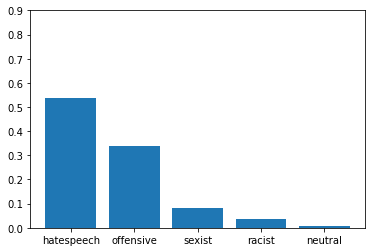

In [32]:
plt.bar(res["labels"], res["scores"])
plt.yticks(list(np.arange(0, 1, 0.1)))
plt.show()

<AxesSubplot:xlabel='labels', ylabel='values'>

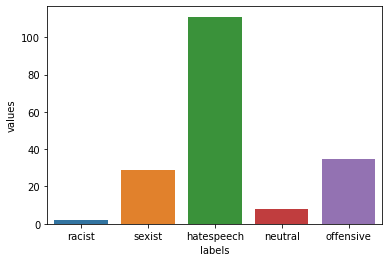

In [33]:
sns.barplot(data = df_frequency, x = 'labels', y = 'values')